# Name : Sachin M D

## GRIP @ The Sparks Foundation

### Task 1:

Simple Linear Regression 

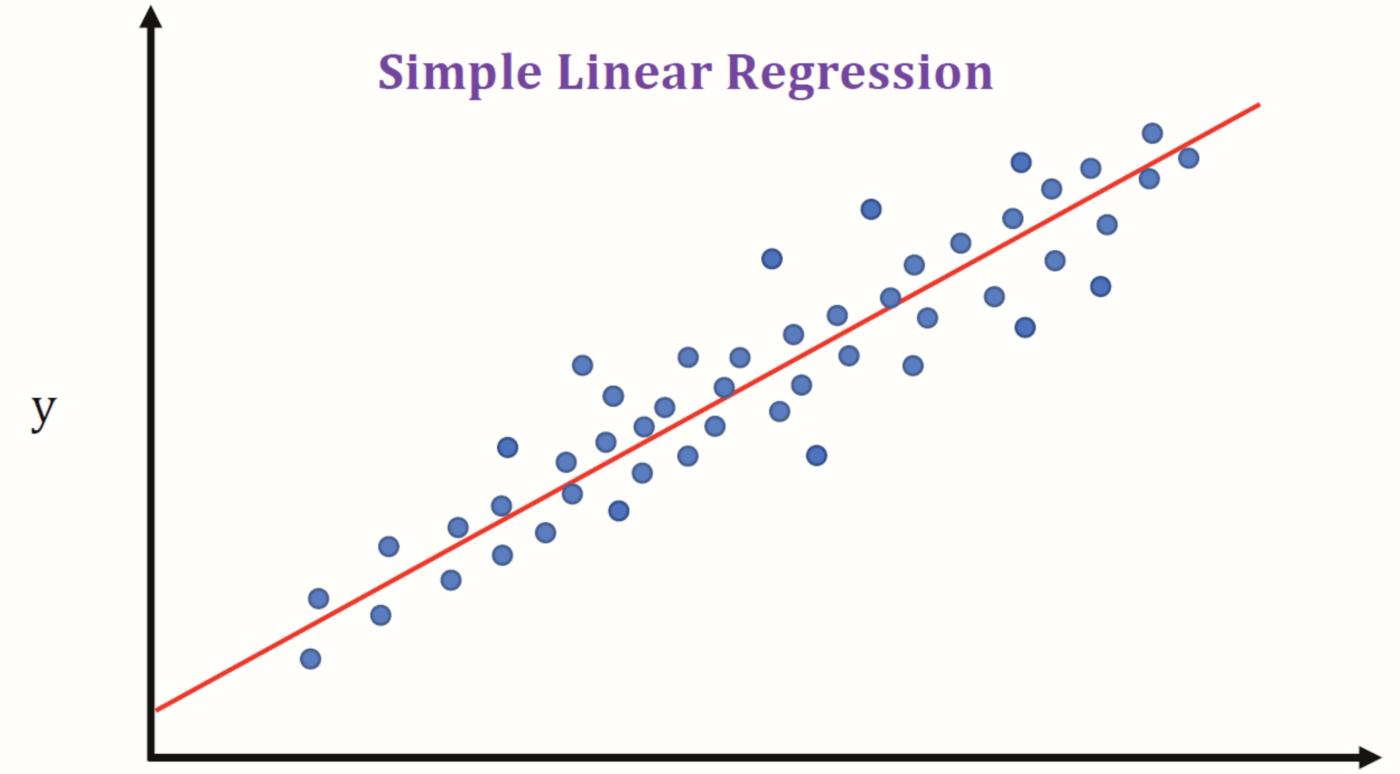

### Problem Statement

Predict the percentage of an student based on the numbers of study hours.

### Dataset Name
student_scores - student_scores.csv

### Column Description
Independent Variable : **Hours** (Number of hours student has studied in a day)

Target Variable : **Scores** (Percentage of marks obtained by the student corresponding to the number of study hours he has studied)

In [11]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
%matplotlib inline

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [29]:
data.shape #shape of the data

(25, 2)

In [32]:
data.info() #Info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [33]:
data.describe() #statistical five point summary of the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Missing value Check

In [34]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### There are no missing values in the dataset

In [36]:
len(data[data.duplicated()]) #Duplicate value check

0

#### There are no duplicate values in the dataset

## Skewness

In [38]:
print("Skewness :")
print(data.skew())

Skewness :
Hours     0.190338
Scores    0.233965
dtype: float64


## Outlier check

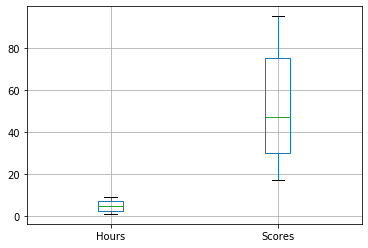

In [40]:
data.boxplot()
plt.show()

#### There are no outliers in the data

## Relationship between target and independant variables

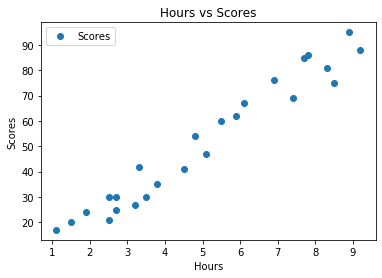

In [5]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Simple Linear Model

In [6]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

## Train-Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

## LInear Regression Model

In [9]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## Predicting the Scores for test values

In [18]:
y_pred = model.predict(X_test)

## Comparing actual and predicted values

In [19]:
df = pd.DataFrame({'Test': y_test, 'Predicted_test': y_pred})  
df 

,Test,Predicted_test
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Plottting the intercept

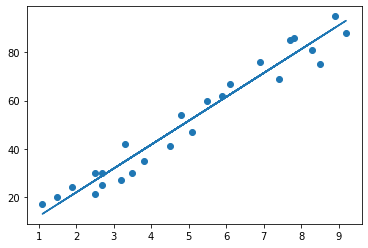

In [17]:
intercept = model.coef_*X+model.intercept_
plt.scatter(X, y)
plt.plot(X, intercept);
plt.show()

# Model Performance Evaluation

In [21]:
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  4.183859899002975
Mean Squared Error:  21.5987693072174
Root Mean Squared Error:  4.6474476121003665


# Predicting the score if a student studies for 9.25 hrs/ day?

In [27]:
hour =np.array(9.25)
hour=hour.reshape(1,-1)
score = model.predict(hour)
print("No of Hours = {}".format(hour[0][0]))
print("Predicted Score = {}".format(score[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### END